# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>ML Decision Tree Regression (CART_Regression)</b></p>

**Decision Tree and Regression: Working Principle**

- Decision trees are powerful ML models that are effectively used in both classification and regression problems. When used for regression problems, the basic working principle of a decision tree is to predict the values of continuous variables in the dataset.
- This process involves dividing the dataset into homogeneous subsets, minimizing the variance within each subset.

### **Variance and Mean-Based Approach**

#### **Difference**
- In regression problems, decision trees do not use purity measures such as entropy or Gini, which are common in classification problems.
- Instead, tree structures utilize statistical methods like variance minimization to improve predictions of continuous variables in the dataset.

#### **Variance Usage**
- The Decision Tree Regressor is designed to split the dataset in a way that minimizes the variance of the subsets created after each split.
- Variance measures how much the values in a dataset deviate from the mean of the dataset.
- By minimizing variance, a decision tree groups data points with similar values, enabling more consistent predictions.

### **Prediction Method**

- In a Decision Tree Regressor, the average of the data points covered by a branch or node is used as the predicted value for that branch or node.
- This method generalizes the prediction for a region by taking the average of all data points' values in that region.

# Exploratory Data Analysis

**About Dataset**

- **Car_Name**: The name or model of the car.
- **Year**: The year of manufacture of the car.
- **Selling_Price**: The selling price of the car.
- **Present_Price**: The current showroom price of the car.
- **Kms_Driven**: The total kilometers driven by the car up to the point of sale.
- **Fuel_Type**: This column would contain categories such as:
  - **Petrol**: Cars that run on petrol fuel.
  - **Diesel**: Cars that use diesel fuel.
  - **CNG**: Cars that are powered by compressed natural gas.

- **Seller_Type**: This column would indicate the type of seller offering the car, which could be:
  - **Dealer**: A business that sells cars as part of its commercial operations.
  - **Individual**: A private individual selling a personal vehicle.

- **Transmission**: This refers to the gearbox system of the car, with common types being:
  - **Manual**: Cars where the driver manually shifts gears.
  - **Automatic**: Cars where the gear shifting process is automated.

- **Owner**: This would typically be a numeric column indicating the number of previous owners of the car, but if it is categorical, it might have entries such as:
  - **First Owner**: Indicates the car is being sold by its original owner.
  - **Second Owner**: Indicates the car has had one previous owner before the current seller.
  - **Third Owner**, and so on.
  
This data set is for estimating the selling price of a car based on its features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf  # !pip install cufflinks

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams["figure.figsize"] = (9, 5)

import warnings

warnings.filterwarnings('ignore')

In [2]:
df0 = pd.read_csv("car_dataset.csv")
df = df0.copy()

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.000,2013.628,2.892,2003.000,2012.000,2014.000,2016.000,2018.000
Selling_Price,301.000,4.661,5.083,0.100,0.900,3.600,6.000,35.000
Present_Price,301.000,7.628,8.644,0.320,1.200,6.400,9.900,92.600
Kms_Driven,301.000,36947.206,38886.884,500.000,15000.000,32000.000,48767.000,500000.000
Owner,301.000,0.043,0.248,0.000,0.000,0.000,0.000,3.000


In [8]:
import plotly.express as px

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

fig = px.imshow(corr_matrix, text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

In [14]:
# sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

# # sns.heatmap(df.corr(), annot = True)

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0


In [10]:
df["Vehicle_Age"] = 2025 - df.Year

In [11]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.250,9.850,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.850,4.150,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.600,6.870,42450,Diesel,Dealer,Manual,0,11


In [12]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [13]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: Car_Name
------------------------------
Unique Values (98): ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS 

In [14]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

# Veri setimde 301 gözlem bulunmasına rağmen, *car_name* özelliğinde 98 farklı marka ve model var.
# Yüksek kardinaliteye sahip bir kategorik değişkene Ordinal Encoder uygulamak, modelin performansını olumsuz etkileyebilir.
# Karar ağaçları (DT modelleri) yüksek kardinaliteye sahip kategorik değişkenlere fazla ağırlık verebilir.
# Bu durum, sıkça görülen markaların yanı sıra, nadir bulunan markaların da modelde gereksiz yere yüksek önem taşımasına yol açabilir.
# Çoğu markanın ve modelin veri setinde sadece 1-2 kez yer alması, bu değişkenin modelin öğrenme sürecine katkı sağlamayacağını gösteriyor.
# Nadir gözlemler, modelin doğru genelleme yapabilmesi açısından yanıltıcı olabilir.
# Bu nedenle, *car_name* değişkenini modelden çıkarma kararı alıyoruz.

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,11
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,12
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,8
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,14
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,11


<Figure size 1200x600 with 0 Axes>

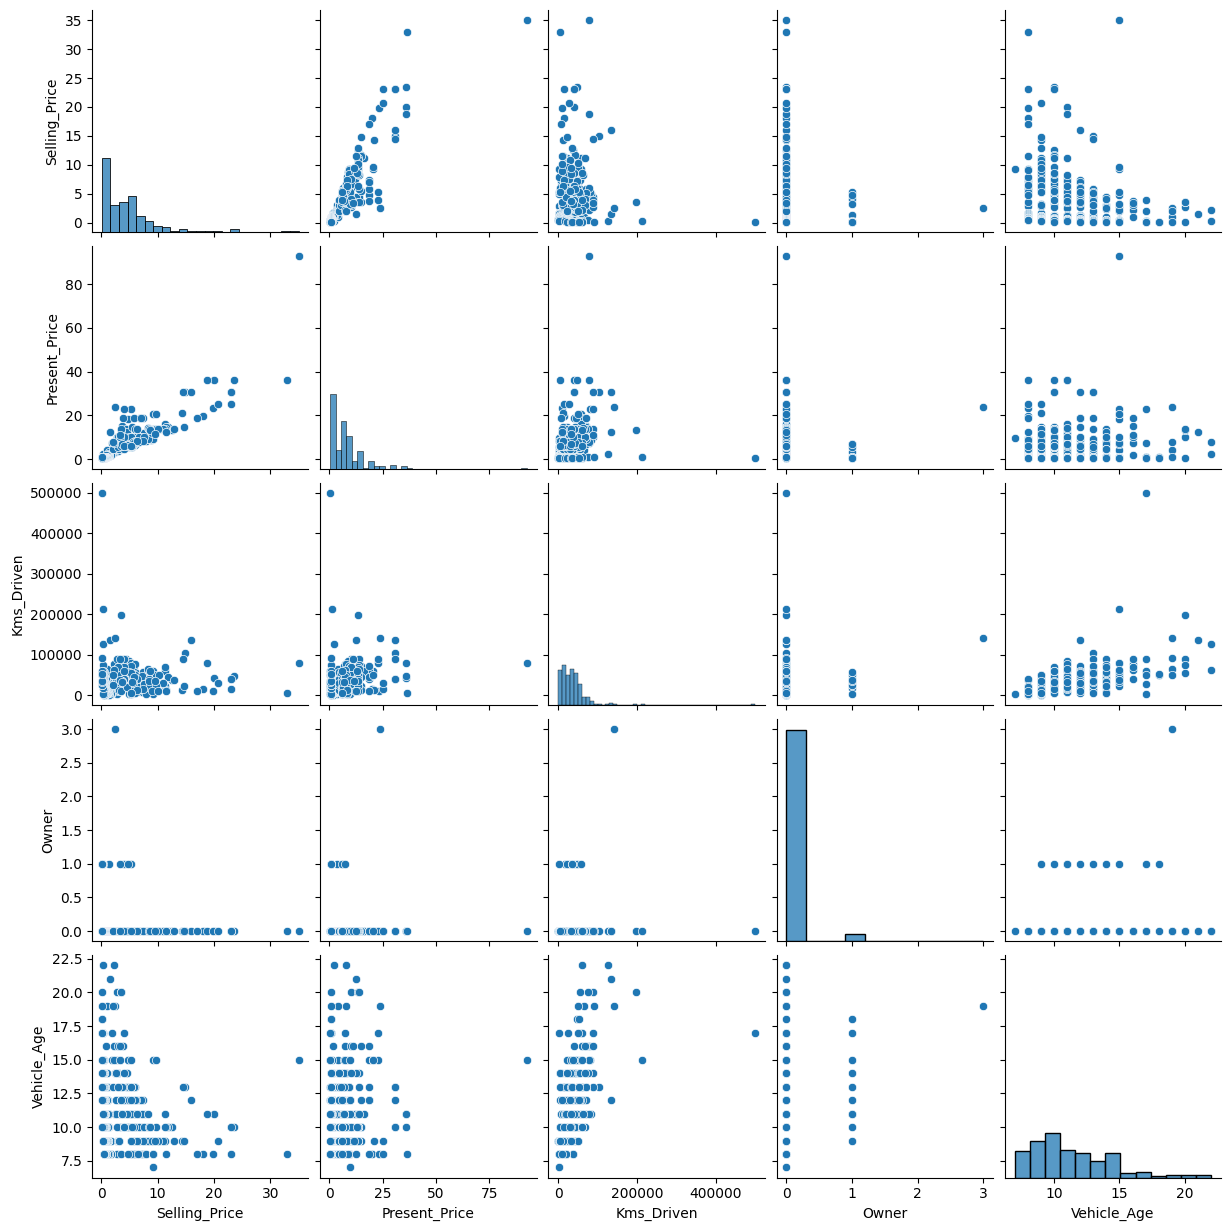

In [16]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, palette="Dark2")

In [17]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df['Selling_Price']], ['Selling Price'],
                         show_hist=True,
                         show_rug=True)

fig.update_layout(
    title_text='Distribution and Box Plot of Selling Prices',  # Başlık metni
    title_font_size=20,  # Başlık font büyüklüğü
    xaxis_title_text='Selling Price',  # X eksen başlığı
    yaxis_title_text='Density',  # Y eksen başlığı
    template='plotly_white',  # Arka planı beyaz yapıyoruz
    width=1000,  # Grafiğin genişliği
    height=500,  # Grafiğin yüksekliği
    bargap=0.01,  # Barlar arası boşluk
)

fig.show()

# Tree-based modeller, outlierlara karşı oldukça robust (güçlü) bir yapıdadır.
# Ancak küçük regresyon veri setlerinde bu durum geçerli değildir.
# Küçük regresyon veri setlerinde outlier değerler, düştükleri yapraklardaki ortalama fiyatları ciddi şekilde yükseltebilir veya azaltabilir.
# Bu nedenle, eğitim için yetersiz olan outlier gözlemlerini düşürmek, tree-based modellerde önemlidir.
# Her zaman olduğu gibi, hem outlierlar ile hem de outlierları düşürerek model skorlarını karşılaştırıp farkları görmeliyiz.

# *show_rug* parametresi, veri noktalarının x eksenindeki konumlarını küçük çizgilerle gösterir.
# Bu, her bir gözlemin dağılımını ve yoğunluğunu daha ayrıntılı bir şekilde görmek için kullanışlıdır.

# Rug plot, histogram veya kernel density estimate (KDE) grafiklerinin altında yer alır.
# Her bir veri noktasını temsil eden küçük dikey çizgiler, veri setindeki değerlerin nerede yoğunlaştığını ve potansiyel olarak outlier'ların nerede bulunduğunu gösterir.
# Bu özellik, veri setinin dağılımını anlamada faydalıdır çünkü rug plot'lar veri noktalarının yığılma alanlarını ve nadir bulunan bölgeleri net bir şekilde gösterir.

In [18]:
import plotly.graph_objs as go

box_plot = go.Box(y=df['Selling_Price'], name='Selling Price')

fig = go.Figure(data=[box_plot])
fig.update_layout(title='Selling Price Box Plot')
fig.show()

# Modelling

## Train | Test Split

In [19]:
X = df.drop("Selling_Price", axis=1)
y = df.Selling_Price

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 7)
Train target shape   :  (240,)
Test features shape  :  (61, 7)
Test target shape    :  (61,)


## Modelling with Pipeline & ColumnTransformer

In [22]:
cat = X_train.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [23]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [26]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {
        "train": {
            "R2": r2_score(y_train, y_train_pred),
            "mae": mean_absolute_error(y_train, y_train_pred),
            "mse": mean_squared_error(y_train, y_train_pred),
            "rmse": np.sqrt(mean_squared_error(y_train, y_train_pred))
        },
        "test": {
            "R2": r2_score(y_test, y_pred),
            "mae": mean_absolute_error(y_test, y_pred),
            "mse": mean_squared_error(y_test, y_pred),
            "rmse": np.sqrt(mean_squared_error(y_test, y_pred))
        }
    }

    return pd.DataFrame(scores)

In [27]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.933
mae,0.000,0.512
mse,0.000,0.646
rmse,0.000,0.804


In [28]:
0.804 / y.mean()

0.17248423078293718

In [29]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]
model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                              0.872
train_r2                             1.000
test_neg_mean_absolute_error        -0.828
train_neg_mean_absolute_error        0.000
test_neg_mean_squared_error         -4.450
train_neg_mean_squared_error         0.000
test_neg_root_mean_squared_error    -1.665
train_neg_root_mean_squared_error    0.000
dtype: float64

## Outlier handling to improve scores

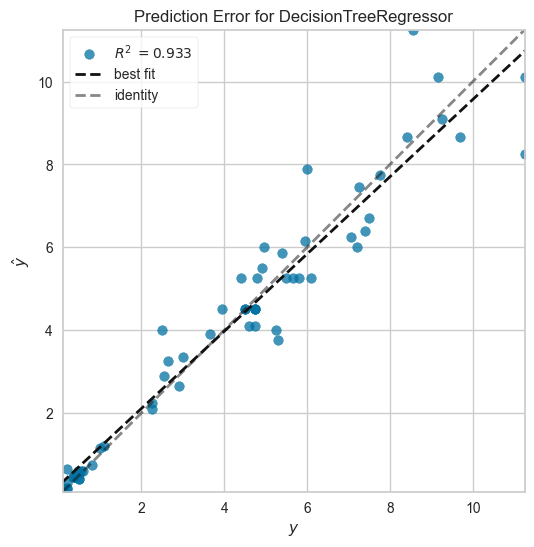

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [30]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 600))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

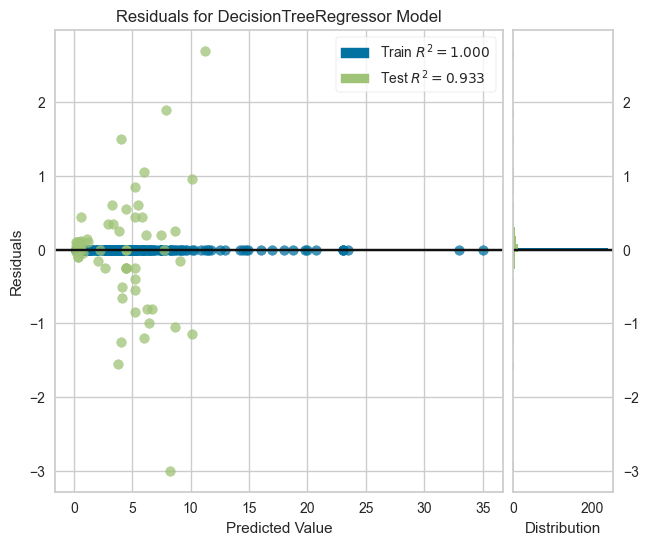

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [31]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(720, 600))
model = pipe_model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [32]:
print(len(df[df.Selling_Price > 10]))

28


In [33]:
print(28 / 301)

0.09302325581395349


In [34]:
df2 = df[df.Selling_Price < 10]
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,3.350,5.590,27000,Petrol,Dealer,Manual,0,11
1,4.750,9.540,43000,Diesel,Dealer,Manual,0,12
2,7.250,9.850,6900,Petrol,Dealer,Manual,0,8
3,2.850,4.150,5200,Petrol,Dealer,Manual,0,14
4,4.600,6.870,42450,Diesel,Dealer,Manual,0,11


In [35]:
X = df2.drop(columns="Selling_Price")
y = df2.Selling_Price

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [38]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,1.000,0.935
mae,0.000,0.493
mse,0.000,0.533
rmse,0.000,0.730


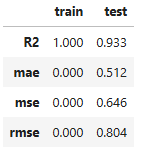

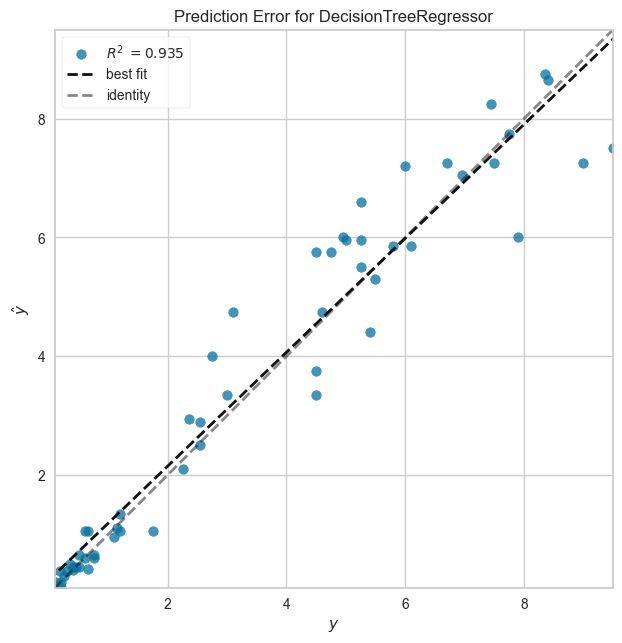

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [39]:
visualizer = RadViz(size=(720, 3000))

model = pipe_model
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

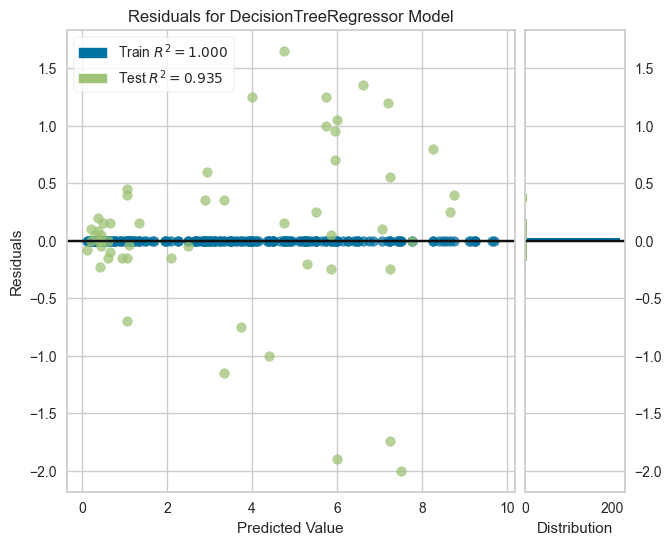

<Axes: title={'center': 'Residuals for DecisionTreeRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [40]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(720, 600))
model = pipe_model
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Overfitting Risk and Features Importance

**Overfitting Analysis in Decision Tree Models**

**Examining Model Performance on Training Data**

- **Observation**: If a decision tree model performs nearly or completely error-free on the training dataset, it may indicate that the model has a tendency to overfit the training data.
- **Analysis**: High performance on the training set suggests that the model captures details but may miss underlying patterns, leading to overfitting.

**Evaluation of Cross-Validation Results**

- **Observation**: If the model's cross-validation scores are significantly lower than its training set scores, it indicates poor generalization ability.
- **Analysis**: Cross-validation is a reliable method to evaluate the model's performance on different subsets of data. Lower cross-validation scores compared to training scores are a clear sign of overfitting.

**Recommendations to Address Overfitting**

- **Hyperparameter Tuning**: Adjust hyperparameters to reduce model complexity and improve generalization. Techniques such as limiting the depth of the decision tree or applying pruning can be effective.
- **Expanding the Dataset**: Train the model with more data to increase its generalization capacity. More diverse examples help the model learn stronger patterns.
- **Feature Engineering**: Remove unnecessary or misleading features, select important features, or transform features to improve the model's generalization performance.


In [41]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]
pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=[
                            'r2', 
                            'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                              0.892
train_r2                             1.000
test_neg_mean_absolute_error        -0.534
train_neg_mean_absolute_error        0.000
test_neg_mean_squared_error         -0.701
train_neg_mean_squared_error         0.000
test_neg_root_mean_squared_error    -0.814
train_neg_root_mean_squared_error    0.000
dtype: float64

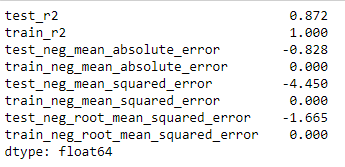

In [42]:
pipe_model["DT_model"].feature_importances_

array([8.72315324e-03, 9.97470116e-04, 1.82731815e-03, 8.39118154e-01,
       2.14765459e-02, 1.55162018e-05, 1.27841843e-01])

- **8.72315324e-03** (yaklaşık **0.0087**)
- **9.97470116e-04** (yaklaşık **0.0010**)
- **1.82731815e-03** (yaklaşık **0.0018**)
- **8.39118154e-01** (yaklaşık **0.8391**)
- **2.14765459e-02** (yaklaşık **0.0215**)
- **1.55162018e-05** (yaklaşık **0.00002**)
- **1.27841843e-01** (yaklaşık **0.1278**)

In [43]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__Vehicle_Age'], dtype=object)

In [44]:
new_features = [i.replace("ordinalencoder__", "").replace("remainder__", "") for i in features]
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Vehicle_Age']

In [45]:
df_fi = pd.DataFrame(
    data=pipe_model["DT_model"].feature_importances_,
    index=new_features,  #index=X.columns
    columns=["Feature Importance"])
df_fi = df_fi.sort_values("Feature Importance", ascending=False)

df_fi

,Feature Importance
Present_Price,0.839
Vehicle_Age,0.128
Kms_Driven,0.021
Fuel_Type,0.009
Transmission,0.002
Seller_Type,0.001
Owner,0.000


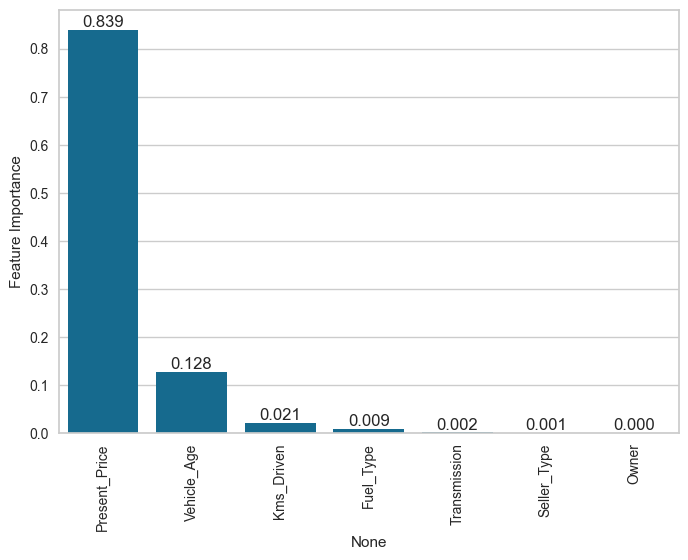

In [46]:
ax = sns.barplot(x=df_fi.index, y='Feature Importance', data=df_fi)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.xticks(rotation=90)
plt.show()

**Decision Tree Modellerde Feature Importance ve Sınırlamaları**

**Feature Importance Sınırlamaları ve İncelemesi**

- **Sınırlama ve Önem Derecelendirmesi**: Karar ağaçlarında feature importance, genellikle o feature ın ağaçta kullanılma sıklığı ve yaprak düğümlerinde sağladığı ortalama bilgi kazancına dayanır. Ancak bu, her feature ın modelin tahminlerine katkısının mutlak değerini doğru bir şekilde yansıtmayabilir.
- **Analiz Yöntemleri**: Modelden bir feature ı çıkarmak ve modelin performansını yeniden değerlendirmek, o feature ın model üzerindeki etkisini daha net anlamak için kullanılabilir. Eğer bir feature ın çıkarılması model performansında büyük bir düşüşe neden oluyorsa, bu feature ın model için önemli olduğu sonucuna varılabilir.

**Uygulama Örneği ve Değerlendirme**

- **Deney Tasarımı**: Modelden bir feature ın çıkarılmasının etkisi, modelin doğruluk skoru veya diğer performans metrikleri üzerinde gözlemlenebilir. Eğer feature çıkarıldığında performans düşerse, bu feature ın model için önemli olduğu anlaşılır.
- **Sonuçların Yorumlanması**: Feature Importance derecelendirmesi yüksek olan bir feature ın çıkarılması modelin performansını önemli ölçüde etkiliyorsa, bu özelliğin model için gerçekten önemli olduğu sonucuna varılır.
- **Karar Verme**: Modelin doğruluğunda anlamlı bir azalma gözlemlenirse, bu feature ın model içerisinde muhafaza edilmesi uygun olabilir. Böylelikle modelin genel performansı korunmuş olur.

In [47]:
X2 = X.drop(columns=["Present_Price"])

In [48]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101)

In [49]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model2 = Pipeline(steps=operations)

pipe_model2.fit(X_train2, y_train2)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [50]:
y_pred = pipe_model2.predict(X_test2)
y_train_pred = pipe_model2.predict(X_train2)

In [51]:
train_val(pipe_model2, X_train2, y_train2, X_test2, y_test2)

,train,test
R2,0.998,0.706
mae,0.013,1.008
mse,0.010,2.404
rmse,0.102,1.550


In [52]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train2,
                        y_train2,
                        scoring=[
                            'r2', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_root_mean_squared_error'
                        ],
                        cv=10,
                        return_train_score=True)
df2_scores = pd.DataFrame(scores)
df2_scores.mean()[2:]

test_r2                              0.193
train_r2                             0.999
test_neg_mean_absolute_error        -1.564
train_neg_mean_absolute_error       -0.011
test_neg_mean_squared_error         -5.214
train_neg_mean_squared_error        -0.009
test_neg_root_mean_squared_error    -2.246
train_neg_root_mean_squared_error   -0.092
dtype: float64

In [53]:
decision_tree_model = pipe_model2.named_steps["DT_model"]

feature_importances = decision_tree_model.feature_importances_

df2_fi = pd.DataFrame(data=feature_importances,
                      index=X_train2.columns,
                      columns=["Feature Importance"])

df2_fi = df2_fi.sort_values(by="Feature Importance", ascending=False)

df2_fi

,Feature Importance
Fuel_Type,0.607
Transmission,0.185
Vehicle_Age,0.152
Kms_Driven,0.035
Seller_Type,0.017
Owner,0.004


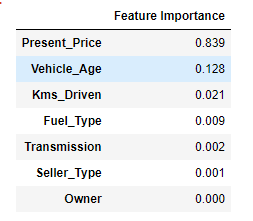

## Visualizing Trees

**Splitting Process in Decision Tree Regression**

 **Statistical Approach**
- In regression trees, the splitting process requires a rigorous statistical analysis to determine the optimal split points for continuous variables. This analysis evaluates the potential for variance reduction at each possible split point.

**Splitting Criterion**
- The criterion used in the splitting process is typically a metric such as **Minimum Variance Reduction (MVR)** or **Mean Squared Error Reduction (MSER)**. These metrics ensure that the dataset is divided into homogeneous subgroups, leading to a tighter distribution of values around the mean within each group.

 **Optimization**
- The splitting process groups the continuous values in the dataset to minimize variance. The average of the data points within each group is used as the predicted value for that group. This aligns the model's predictions more closely with the true distribution of the dataset.

**Model Behavior**
- A regression tree applies a continuous splitting process on the data and uses the average of each subgroup to make predictions. This methodology effectively captures variability and patterns in the training dataset, enhancing the model’s predictive performance on new data.

---

 **Effectiveness and Complexity**

 **Tree Size**
- Regression trees typically create more nodes and branches than classification trees because the split points for continuous variables are more numerous and detailed. This increases the model's complexity and the risk of overfitting.

**Pruning Strategies**
- Pruning strategies are employed to manage this complexity. Pruning prevents excessive complexity while maintaining the model's ability to generalize. It helps reduce overfitting tendencies, ultimately lowering the generalization error.

In [54]:
from sklearn.tree import plot_tree

In [55]:
X = df2.drop(columns="Selling_Price")
y = df2.Selling_Price

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [57]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model', DecisionTreeRegressor(random_state=101))])

In [58]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__Vehicle_Age'], dtype=object)

In [59]:
new_features = [i.replace("ordinalencoder__", "").replace("remainder__", "") for i in features]
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Vehicle_Age']

In [60]:
pd.DataFrame(pipe_model["OrdinalEncoder"].fit_transform(X_train),
             columns=new_features)

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,Vehicle_Age
0,2.000,1.000,1.000,0.540,14000.000,0.000,9.000
1,2.000,0.000,1.000,4.600,22517.000,0.000,14.000
2,2.000,0.000,1.000,5.900,9800.000,0.000,12.000
3,1.000,0.000,1.000,9.400,49000.000,0.000,12.000
4,2.000,0.000,1.000,18.610,72000.000,0.000,13.000
5,2.000,1.000,1.000,0.870,15000.000,0.000,9.000
6,2.000,0.000,1.000,7.600,50456.000,0.000,19.000
7,2.000,0.000,1.000,6.760,40000.000,0.000,11.000
8,2.000,1.000,1.000,2.400,7000.000,0.000,11.000
9,2.000,1.000,1.000,2.280,127000.000,0.000,22.000


In [61]:
X_train.head(1)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
164,0.540,14000,Petrol,Individual,Manual,0,9


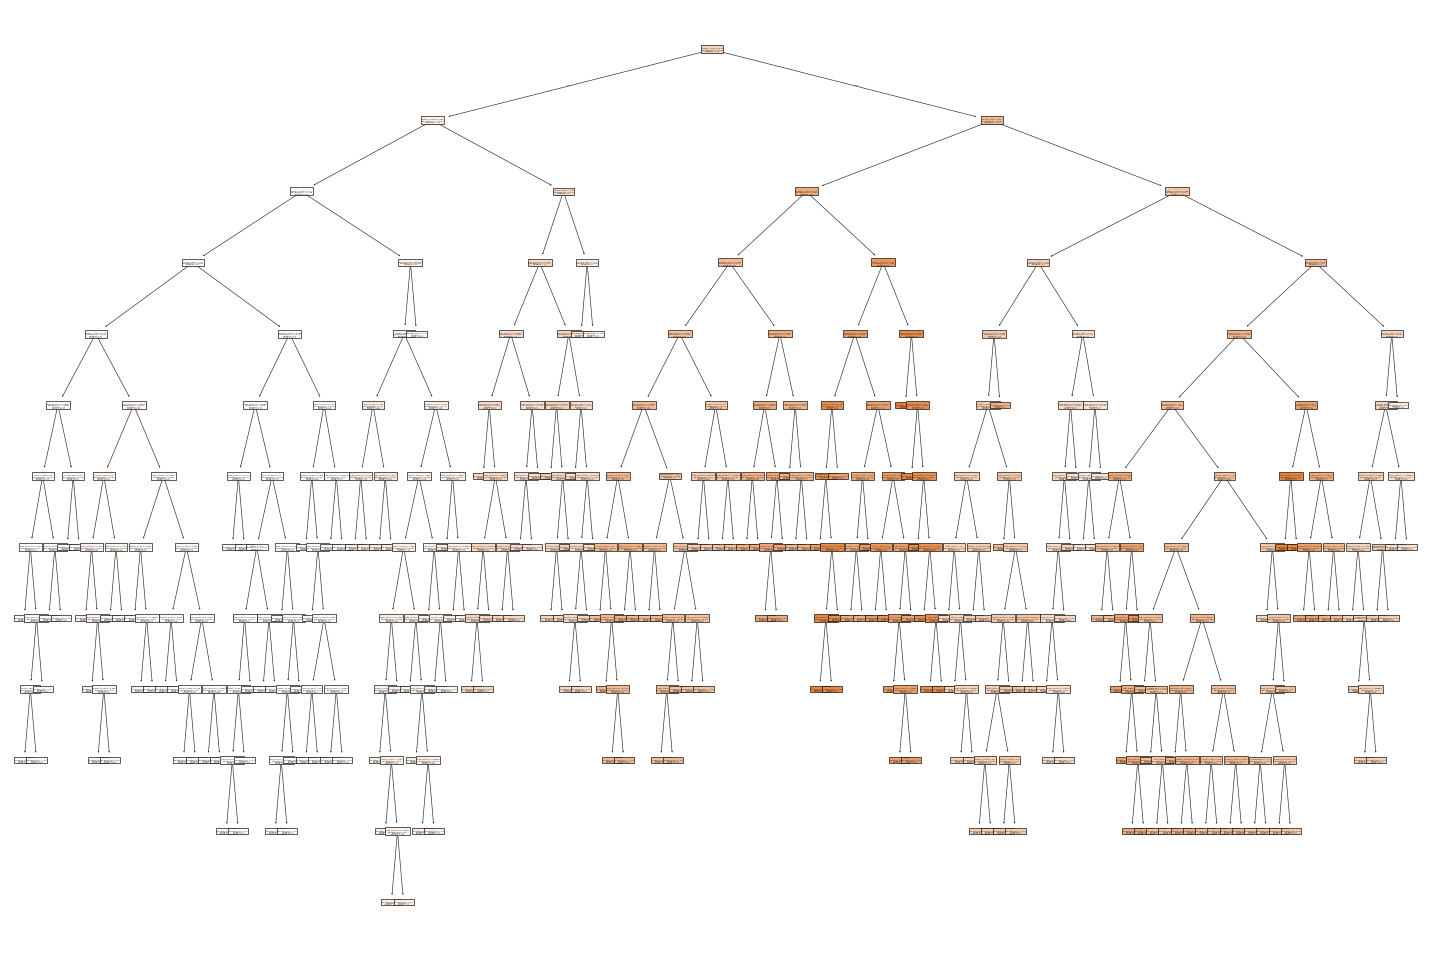

In [62]:
plt.figure(figsize=(12, 8), dpi=150)
plot_tree(pipe_model["DT_model"], filled=True, feature_names=new_features);
#feature_names=X.columns

In [63]:
def report_model(model):
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    print('\n')
    print(train_val(model, X_train, y_train, X_test, y_test))
    print('\n')
    plt.figure(figsize=(12, 8), dpi=100)
    plot_tree(model["DT_model"],
              filled=True,
              feature_names=new_features,
              fontsize=8)
    #feature_names=X.columns



      train  test
R2    0.873 0.928
mae   0.591 0.524
mse   0.874 0.589
rmse  0.935 0.768




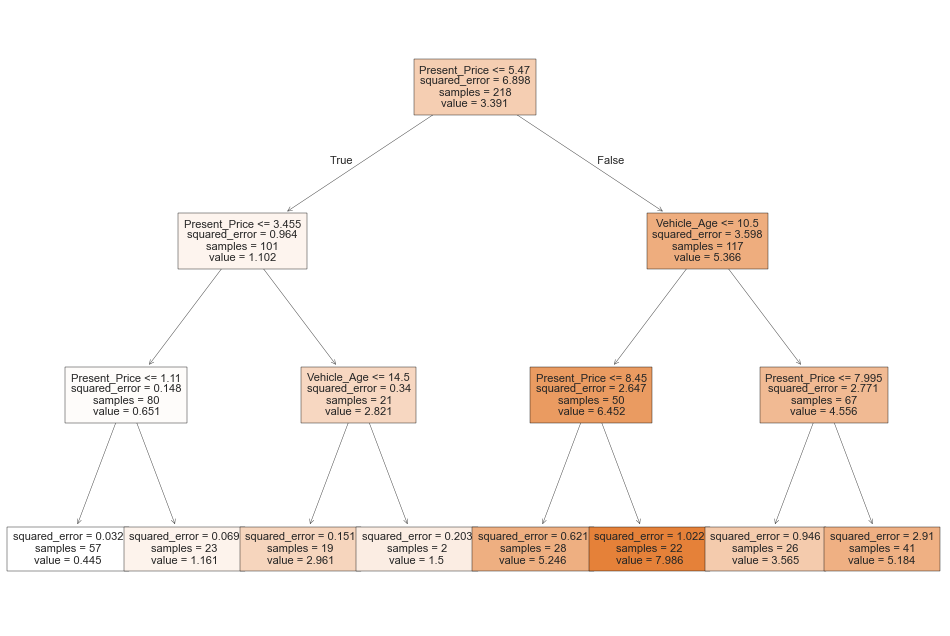

In [ ]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model",
               DecisionTreeRegressor(criterion='squared_error',
                                     max_depth=3,
                                     random_state=101))]

pruned_tree = Pipeline(steps=operations)
pruned_tree.fit(X_train, y_train)

report_model(pruned_tree)

# The only difference from classification is that the criterion is set to `'squared_error'`. In classification, this hyperparameter would typically be `'gini'` or `'entropy'`.
# In regression, the criterion can take one of the following values: `"squared_error"`, `"friedman_mse"`, `"absolute_error"`, or `"poisson"`.
# The `"squared_error"` criterion represents the mean squared error.
# An error of 0 for a leaf means that all cars in that leaf have the same price, while a value close to 0 indicates that the cars' prices are very similar.
# A high error value indicates that the leaf contains cars with vastly different prices.

**NOTE:** At each split, the weighted average of the variances of the groups created is subtracted from the variance before the split. The split point with the highest variance reduction becomes the new node.

In [91]:
X.head(1)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,5.590,27000,Petrol,Dealer,Manual,0,11


In [88]:
df.loc[164]

Selling_Price         0.450
Present_Price         0.540
Kms_Driven            14000
Fuel_Type            Petrol
Seller_Type      Individual
Transmission         Manual
Owner                     0
Vehicle_Age               9
Name: 164, dtype: object

## Grid Search

**Criterion**

1. **`squared_error`**:
   - This is the Mean Squared Error (MSE) criterion used to evaluate the quality of a split.
   - It finds the best split by minimizing the mean squared error at each node.
   - Typically the default criterion, it helps reduce the variance of the target variable in the tree.

2. **`friedman_mse`**:
   - Developed by the renowned statistician Jerome Friedman, this is an improved version of the squared error metric.
   - Commonly used with gradient boosting trees, it includes an additional correction term to enhance splits.
   - This criterion is designed to improve performance, particularly in gradient boosting models.

3. **`absolute_error`**:
   - Uses Mean Absolute Error (MAE) to evaluate split quality.
   - Preferred when reducing the impact of outliers, as it considers absolute differences rather than squared differences.
   - It can be computationally expensive since the derivative of the absolute value function is not defined at all points.

4. **`poisson`**:
   - Suitable for cases where regression targets follow a Poisson distribution, such as count data or event rates.
   - Poisson loss evaluates the quality of predictions on true counts for the target variable.
   - Poisson regression is particularly useful when the target variable is a count (e.g., the number of events in a time interval) and the error terms' variance is proportional to the mean values.

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
operations = [("OrdinalEncoder", column_trans),
              ("DT_model", DecisionTreeRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

In [67]:
param_grid = {
    "DT_model__splitter": ["best", "random"],
    "DT_model__criterion": ["squared_error", "friedman_mse", "absolute_error"],
    "DT_model__max_depth": [2, 3,],
    "DT_model__min_samples_leaf": [1, 2, 3],
    "DT_model__min_samples_split": [2, 3],
    "DT_model__max_features": [4, 5, None]
}

In [68]:
grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [69]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('DT_model',
                                        DecisionTreeRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'DT_model__criterion': ['squared_error',
                                                 'friedman_mse',
                                                 'absolute_error'],
                         'DT_model__max_depth': [2, 3],
                         'DT_model__max_features': [4, 5, None],
                         'DT_model__min_samples_leaf': [1, 2, 3],
                         'DT_model__min_samples_split': [2, 3],
                         'DT_model__splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [70]:
grid_model.best_estimator_ 

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

In [71]:
grid_model.best_params_

{'DT_model__criterion': 'absolute_error',
 'DT_model__max_depth': 3,
 'DT_model__max_features': None,
 'DT_model__min_samples_leaf': 1,
 'DT_model__min_samples_split': 2,
 'DT_model__splitter': 'best'}

In [72]:
index = grid_model.best_index_
index

204

In [73]:
pd.DataFrame(
    grid_model.cv_results_).loc[index, ["mean_test_score", "mean_train_score"]]

mean_test_score    -1.074
mean_train_score   -0.975
Name: 204, dtype: object

In [74]:
grid_model.best_score_

-1.0740459549634755

In [75]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.861,0.877
mae,0.621,0.700
mse,0.957,1.010
rmse,0.978,1.005


# Compare real and predicted result

In [76]:
y_pred = grid_model.predict(X_test)
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [77]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
296,9.500,6.950,2.550
39,2.250,4.225,-1.975
15,7.750,6.950,0.800
221,4.500,3.000,1.500
127,0.750,0.510,0.240
114,1.150,1.150,0.000
195,0.180,0.510,-0.330
180,0.300,0.285,0.015
291,5.400,4.575,0.825
110,1.200,1.150,0.050


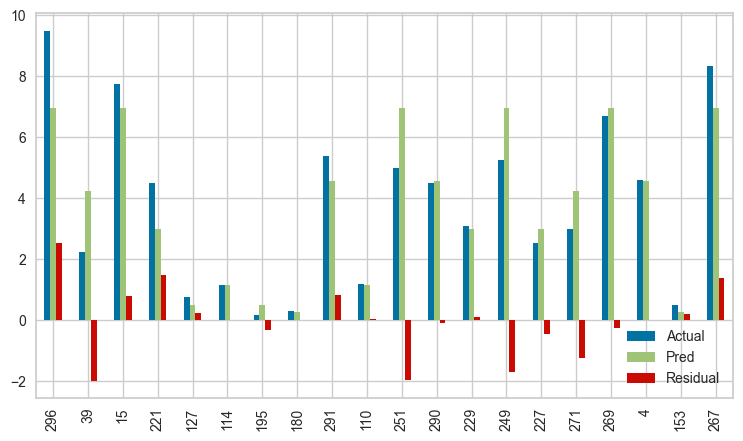

In [78]:
comp_sample.plot(kind='bar',figsize=(9,5))
plt.show()

# Final Model & Prediction

In [79]:
X=df2.drop("Selling_Price", axis=1)
y=df2.Selling_Price

In [80]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,5.590,27000,Petrol,Dealer,Manual,0,11
1,9.540,43000,Diesel,Dealer,Manual,0,12
2,9.850,6900,Petrol,Dealer,Manual,0,8
3,4.150,5200,Petrol,Dealer,Manual,0,14
4,6.870,42450,Diesel,Dealer,Manual,0,11


In [81]:
from sklearn.pipeline import Pipeline

operations = [("Ordinalcoder", column_trans),
              ("DT_model",
               DecisionTreeRegressor(criterion="absolute_error",
                                     max_depth=3,
                                     random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

Pipeline(steps=[('Ordinalcoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('DT_model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                                       random_state=101))])

In [82]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,5.590,27000,Petrol,Dealer,Manual,0,11
1,9.540,43000,Diesel,Dealer,Manual,0,12
2,9.850,6900,Petrol,Dealer,Manual,0,8
3,4.150,5200,Petrol,Dealer,Manual,0,14
4,6.870,42450,Diesel,Dealer,Manual,0,11


In [83]:
X.describe()

,Present_Price,Kms_Driven,Owner,Vehicle_Age
count,273.000,273.000,273.000,273.000
mean,5.879,36516.941,0.048,11.527
std,4.955,39529.116,0.260,2.943
min,0.320,500.000,0.000,7.000
25%,0.990,15001.000,0.000,9.000
50%,5.700,32000.000,0.000,11.000
75%,8.920,48000.000,0.000,13.000
max,23.730,500000.000,3.000,22.000


In [84]:
samples = {"Present_Price": [6.5, 9],
           "Kms_Driven": [22000, 41000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "Vehicle_Age":[2, 8]}

In [85]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Vehicle_Age
0,6.500,22000,Petrol,Dealer,Manual,0,2
1,9.000,41000,Diesel,Individual,Automatic,1,8


In [86]:
pipe_model.predict(df_samples)

array([4.65, 6.9 ])